# Case Study - User Personalization 

### Import libraries

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)
import pandas_profiling
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

## Preprocessing

### Read data

In [2]:
users = pd.read_csv("../data/users.csv")
users

,id,country,continent,device,subscription
0,113855,country_59,Europe,Desktop,0
1,94931,country_57,Europe,Mobile,0
2,17797,country_41,South America,Mobile,0
3,50288,country_36,Europe,Desktop,0
4,65004,country_48,Europe,Mobile,0
...,...,...,...,...,...
145239,7369,country_94,Asia,Desktop,0
145240,105027,country_188,North America,Desktop,0
145241,114885,country_94,Asia,Desktop,0
145242,74455,country_40,Asia,Desktop,0


In [3]:
features = pd.read_csv("../data/features.csv")
features

,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,113855,0.000000,0.050595,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.0
1,94931,0.004444,0.309524,0.000000,0,0,0.0,0,NaN,0,0,0,0,0,0.000002,0.000000,0,0.000000,0.000000,0.000000,0.0
2,17797,0.000000,0.171429,0.000000,0,0,NaN,0,0.0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.0
3,50288,0.000000,0.018797,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000023,0.000000,0,0.000000,0.000000,0.000000,0.0
4,65004,0.004444,0.079365,0.035714,0,0,0.0,0,0.0,1,1,0,0,0,0.000300,0.000000,0,0.000000,0.000000,0.000804,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125239,98817,0.008889,0.021825,0.000000,0,1,1.0,0,NaN,1,1,0,0,0,0.000579,0.000656,0,0.000297,0.000051,0.001340,0.0
125240,72424,0.000000,0.038265,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000012,0.000000,0,0.000000,0.000000,0.000000,0.0
125241,90797,0.008889,0.112245,0.000000,0,0,0.0,0,0.0,1,1,0,0,0,0.000238,0.000000,0,0.000000,0.000000,0.000536,0.0
125242,124745,0.004444,0.223214,0.000000,0,0,0.0,0,0.0,1,0,0,0,0,0.000004,0.000000,0,0.000000,0.000000,0.000268,0.0


### Understanding data
Using pandas-profiling we can extend `df.describe` or relevant methods that provide limited usage for exploratory data analysis.

In [4]:
# profile = ProfileReport(users, title='Users Profiling')
# profile.to_file("../data/users_profiling.html")
# profile = ProfileReport(features, title='Features Profiling')
# profile.to_file("../data/features_profiling.html")

Opening the two reports on a browser we can get a useful overview of our data and some info like the duplicate rows on both files and the missing values. We also see the correlation between variables and we notice the high imbalance on the target variable('subscription'), which will guide us on how to continue our study.

Fore the sake of the task and the exploration, we will reproduce some of these info inside this notebook.

### Join datasets
Before merging the dataframes we could check if the three variables on users.csv affect subscription, in order to consider them in the modeling.

- Looking at Cramer's and Phik's correlation plots at `users_profiling.html` we notice that continent and device have zero effect on subscription. Of course, we could use them in model inputs or investigate their effect using t-test, but for a first study they are not necessary.

- The third variable 'Country' has high cardinality and it would be add some complexity if using it with one-hot encoding, so it is also left aside for now.

Since the 'id' is the unique identifier of users on both files we will use it for merging them.
Moreover, since the target variable is separated from features, we will use the inner method.

In [5]:
df = pd.merge(users[['id','subscription']], features, on='id', how='inner').drop_duplicates()
df

,id,subscription,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,113855,0,0.000000,0.050595,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000000,0.0,0,0.0,0.0,0.000000,0.0
1,94931,0,0.004444,0.309524,0.000000,0,0,0.0,0,NaN,0,0,0,0,0,0.000002,0.0,0,0.0,0.0,0.000000,0.0
2,17797,0,0.000000,0.171429,0.000000,0,0,NaN,0,0.0,0,0,0,0,0,0.000000,0.0,0,0.0,0.0,0.000000,0.0
3,50288,0,0.000000,0.018797,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000023,0.0,0,0.0,0.0,0.000000,0.0
7,65004,0,0.004444,0.079365,0.035714,0,0,0.0,0,0.0,1,1,0,0,0,0.000300,0.0,0,0.0,0.0,0.000804,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136861,136053,1,0.000000,0.067857,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000000,0.0,0,0.0,0.0,0.000000,0.0
136862,101527,1,0.000000,0.171429,0.000000,0,0,0.0,0,0.0,0,1,0,0,0,0.000031,0.0,0,0.0,0.0,0.000000,0.0
136863,101395,1,0.008889,0.035714,0.035714,0,0,0.0,0,0.0,0,0,0,0,0,0.000000,0.0,0,0.0,0.0,0.000000,0.0
136864,8292,1,0.000000,0.136905,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000000,0.0,0,0.0,0.0,0.000000,0.0


In [6]:
# profile = ProfileReport(df, title='Data Profiling')
# profile.to_file("../data/df_profiling.html")

### Count null values per column

In [7]:
df.isna().sum()

id                 0
subscription       0
feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_5          0
feature_6       6333
feature_7          0
feature_8       6242
feature_9          0
feature_10         0
feature_11         0
feature_12         0
feature_13         0
feature_14         0
feature_15      6282
feature_16         0
feature_17         0
feature_18         0
feature_19      6244
feature_20         0
dtype: int64

### Check subscription distribution and null values on minority class

In [8]:
df['subscription'].value_counts()
sub_df = df[df['subscription']==1]

0    119472
1      1872
Name: subscription, dtype: int64

In [9]:
sub_df.isna().sum()

id                0
subscription      0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6       114
feature_7         0
feature_8        95
feature_9         0
feature_10        0
feature_11        0
feature_12        0
feature_13        0
feature_14        0
feature_15      110
feature_16        0
feature_17        0
feature_18        0
feature_19      100
feature_20        0
dtype: int64

#### Descriptive statistics for columns with Nans

In [10]:
df[['feature_6', 'feature_8', 'feature_15', 'feature_19']].describe()

,feature_6,feature_8,feature_15,feature_19
count,115011.000000,115102.000000,115062.000000,115100.000000
mean,0.130848,0.006073,0.000335,0.000541
std,0.337236,0.077692,0.007040,0.006146
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


We see that the dataset is highly imbalanced and there are null values on 4 features, which are also present in the minority class.

Moreover, these 4 columns are either binary(6,8), or numerical(15,19) with many distinct values (check `features_profiling.html`). 

#### So we will replace Nans with their most frequent or median values, instead of dropping the samples, in order not to shorten the minority class.

In [11]:
df[['feature_6', 'feature_8']] = df[['feature_6', 'feature_8']].fillna(df.mode().iloc[0])
df[['feature_15', 'feature_19']] = df[['feature_15', 'feature_19']].fillna(df[['feature_15', 'feature_19']].mean())

### Handle duplicates

In [12]:
df[df.duplicated(['id'], keep=False)].sort_values(by='id') # the duplicate rows
df.drop_duplicates(subset =['id'], keep='first', inplace=True)
df[df.duplicated(['id'], keep=False)].sort_values(by='id') #this should dispay nothing after removal of duplicates

,id,subscription,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
134764,30,1,0.000000,0.005714,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000056,0.000335,0,0.0,0.0,0.000000,0.0
134765,30,1,0.000000,0.005714,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000056,0.000000,0,0.0,0.0,0.000000,0.0
40329,196,0,0.004444,0.029018,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000000,0.000000,0,0.0,0.0,0.000541,0.0
40328,196,0,0.004444,0.029018,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000000,0.000000,0,0.0,0.0,0.000000,0.0
61474,222,0,0.000000,0.079365,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000000,0.000000,0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58279,139047,0,0.000000,0.067857,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000000,0.000000,0,0.0,0.0,0.000000,0.0
66709,139141,0,0.000000,0.016071,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000001,0.000000,0,0.0,0.0,0.000000,0.0
66708,139141,0,0.000000,0.016071,0.000000,0,0,0.0,0,0.0,0,0,0,0,0,0.000001,0.000335,0,0.0,0.0,0.000000,0.0
31046,139232,0,0.004444,0.047143,0.035714,0,0,0.0,0,0.0,0,1,0,0,0,0.000003,0.000000,0,0.0,0.0,0.000000,0.0


,id,subscription,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20


## Modeling

In [13]:
# import libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import statsmodels.api as sm

### Feature Exploration with stepwise backward selection
We can take a first idea of the features, by looking their p-values on an OLS model.

In [14]:
def backward_elim(important_df, reference_var):
    X = important_df.drop(reference_var, 1)  # Feature Matrix
    y = important_df[reference_var]  # Target Variable

    # Backward Elimination
    cols = list(X.columns)
    pmax = 1
    while (len(cols) > 0):
        p = []
        X_1 = X[cols]
        # Adding constant column of ones, mandatory for sm.OLS model
        X_1 = sm.add_constant(X_1, has_constant='add')
        model = sm.OLS(y, X_1).fit()
        p = pd.Series(model.pvalues.values[1:], index=cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax > 0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = cols
    return selected_features_BE

In [15]:
important_features = backward_elim(df.drop('id', axis=1), 'subscription')
important_features

['feature_2',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20']

#### Almost all features seem to be important, except few like 1,3,11.
#### However, on the following modeling we will use all of them.

### Helper class

In [16]:
class Model():
    ''' Models' class that adds functionality and reproducability'''
    def __init__(self, input_df):
        '''Class constructor'''
        self.input_df = input_df

    def train_model(self, model, X_train, y_train):
        ''' Train the specified model on the given data'''
        trained_model = model.fit(X_train, y_train)
        return trained_model

    def predict_data(self, trained_model, X_test):
        '''Predict on the given data'''
        y_pred = trained_model.predict(X_test)
        return y_pred

    def print_metrics(self, y_test, y_pred, limited=True):
        ''' Calculate necessary classification metrics'''
        acc = accuracy_score(y_test,y_pred)
        f1 = metrics.f1_score(y_test,y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        roc = metrics.roc_auc_score(y_test,y_pred)
        print(f'Accuracy: {acc:.5f}')
        print(f'F1 Score: {f1:.5f}')
        print(f'Precision: {precision:.5f}')
        print(f'Recall: {recall:.5f}')
        print(f'ROC AUC Score: {roc:.5f}')
        if limited==False:
            print(confusion_matrix(y_test, y_pred))
            print(classification_report(y_test, y_pred))

    def plot_roc_auc_curve(self, y_pred, y_test):
        ''' Plot Aera Under Curve '''
        fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        
        fig = plt.figure(figsize = (10,5))
        plt.title('Receiver Operating Characteristic');
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
        plt.legend(loc = 'lower right');
        plt.plot([0, 1], [0, 1],'r--');
        plt.xlim([0, 1]);
        plt.ylim([0, 1]);
        plt.ylabel('True Positive Rate');
        plt.xlabel('False Positive Rate');
        plt.show();

    def important_features(self, model_name, trained_model):
        ''' Calculate the most important features of the classfiers'''
        if model_name == 'Logistic Regression':
            importances = trained_model.coef_[0]
        elif model_name == 'XGBoost':
            importances = trained_model.feature_importances_
        else:
            print('Give a correct model name')
        #plot    
        sorted_idx = importances.argsort()
        plt.barh(self.input_df.columns[sorted_idx], importances[sorted_idx])
        plt.title(model_name + " Feature Importance")
        pass

    def k_fold_val(self, X_train, y_train, models, datasets, k=5, score='accuracy'):
        ''' Run k-fold cross validation for all models and datasets'''
        print('-------------Start of Training-------------')
        results = []
        names = []
        for model_name, model in models:
            for data_name, X_train, y_train in datasets:
                kfold = KFold(n_splits=k, random_state=42, shuffle=True)
                cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=score)
                results.append(cv_results)
                names.append(model_name +'_'+data_name)
                print('{} mean {} and std on {} dataset: {:2f}, {:2f}'.format(model_name, score, data_name, cv_results.mean(), cv_results.std()))
        print('-------------End of Training-------------')
        return results, names

### Check final subscription distribution (target variable)

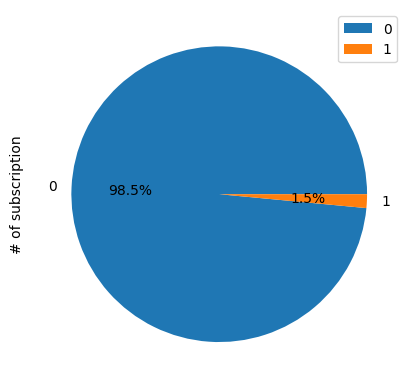

In [17]:
feature_df = df.groupby(['subscription']).size().reset_index(name='# of ' + 'subscription')
feature_df.set_index('subscription', inplace=True)
feature_df.plot(y='# of ' + 'subscription', kind='pie', autopct="%1.1f%%");

### Since we have an imbalanced dataset we may continue in different ways.
We can apply oversampling on minority class, undersampling on the majority class, or SMOTE analysis to generate synthetic samples from the minority class. If we had more than 2 classes then we could balance all the classes by running the algorithm n-1 times

In our study, we create **3 datasets**: *small*, *mid* and *big* concerning size.

Of course, we could use more variations of data and/or even the initial imbalanced dataset, but those 3 inputs are sufficient for this first study.

### Create input & outputs vectors and split data

In [18]:
input_df = df.drop(['subscription','id'], axis=1) # it will be used on model object
input = input_df.values
output = df['subscription'].values.flatten().astype('int')
# define training and test sets
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.1, random_state=42)

### 'Small' dataset with undersampling. ~3200 samples

In [19]:
unique, counts = np.unique(y_train, return_counts=True)
print('Before\n', np.asarray((unique, counts)).T)

under = RandomUnderSampler(sampling_strategy='auto')
X_train_small, y_train_small = under.fit_resample(X_train, y_train)

unique, counts = np.unique(y_train_small, return_counts=True)
print('After\n', np.asarray((unique, counts)).T)

Before
 [[     0 105884]
 [     1   1605]]
After
 [[   0 1605]
 [   1 1605]]


### 'Big' dataset with oversampling. ~210000 samples

In [20]:
unique, counts = np.unique(y_train, return_counts=True)
print('Before\n', np.asarray((unique, counts)).T)

over = RandomOverSampler(sampling_strategy='auto')
X_train_big, y_train_big = over.fit_resample(X_train, y_train)

unique, counts = np.unique(y_train_big, return_counts=True)
print('After\n', np.asarray((unique, counts)).T)

Before
 [[     0 105884]
 [     1   1605]]
After
 [[     0 105884]
 [     1 105884]]


### 'Mid' dataset using both SMOTE and undersampling. ~21000 samples

In [21]:
unique, counts = np.unique(y_train, return_counts=True)
print('Before\n', np.asarray((unique, counts)).T)

# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_mid, y_train_mid = pipeline.fit_resample(X_train, y_train)

unique, counts = np.unique(y_train_mid, return_counts=True)
print('After\n', np.asarray((unique, counts)).T)

Before
 [[     0 105884]
 [     1   1605]]
After
 [[    0 10588]
 [    1 10588]]


### NOTE that we don't perform scaling techniques, since numerical columns are already scaled to range (0,1)

Regarding models, we choose a simple linear model(Logistic regression) and a tree-based (XGBoost).
There is a variety of algorithms out there to choose, like SVM, KNN, neural networks or Random Forest that has good interpretability of the input, although we stick on the simplest classification method and the recent advancement of decision trees that wins a lot of competitions and gathered a lot of attention.

Note that we don't perform exhaustive hyperparameter tuning, although xgboost has a lot of parameters. That option would be time consuming and is out of scope on this first study.

### Define datasets and models

In [22]:
datasets = []
datasets.append(('Small', X_train_small, y_train_small))
datasets.append(('Mid', X_train_mid, y_train_mid))
datasets.append(('Big', X_train_big, y_train_big))

models = []
models.append(('LR', LogisticRegression()))
models.append(('XGBoost', XGBClassifier()))

### Initialize model object

In [23]:
model_obj = Model(input_df)

### K-fold cross validation

In [24]:
results, names = model_obj.k_fold_val(X_train, y_train, models, datasets, k=5, score='accuracy')

-------------Start of Training-------------
LR mean accuracy and std on Small dataset: 0.661371, 0.014895
LR mean accuracy and std on Mid dataset: 0.661787, 0.005650
LR mean accuracy and std on Big dataset: 0.660114, 0.003152
XGBoost mean accuracy and std on Small dataset: 0.666355, 0.015866
XGBoost mean accuracy and std on Mid dataset: 0.821449, 0.005469
XGBoost mean accuracy and std on Big dataset: 0.818518, 0.003052
-------------End of Training-------------


### Algorithm comparison

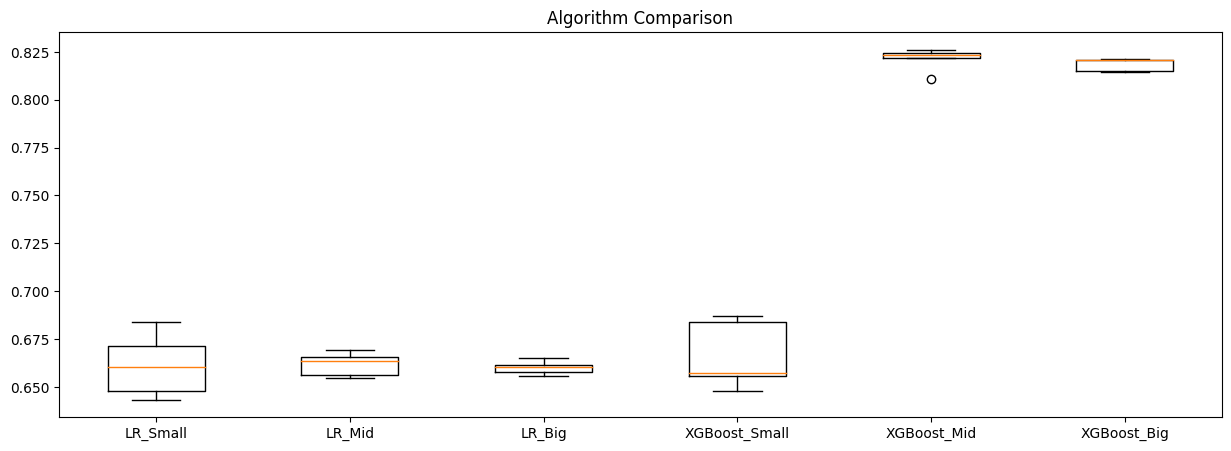

In [25]:
fig = plt.figure(figsize = (15,5));
plt.boxplot(results, labels=names);
plt.title('Algorithm Comparison');

### Comments on algorithms and datasets
- Logistic Regression has approximately 66% accuracy on all datasets
- XGBoost has almost the same accuracy on the small dataset(66%), but performs much better on the other bigger sets (82%).
- Notice that the deviation on the small sets is greater(bigger boxes). The reason for that is the variability between different training subsets on every fold.

## Final training and evaluation
Now, we train both models on the best performing training sets, create predictions on the test set and evaluate their results.
We could only use xgboost, since it outperforms Logistic Regression, but it could be good to get the explainability of both models.



#### For both methods, we display 
- the basic metrics
- confusion matrices
- classification reports
- feature importance
- **Area Under the Curve (AUC)**, which is the measure of the ability of a classifier to distinguish between projects and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

### Logistic Regression

Accuracy: 0.78893
F1 Score: 0.07622
Precision: 0.55914
Recall: 0.04090
ROC AUC Score: 0.51609
[[9319   82]
 [2439  104]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      9401
           1       0.56      0.04      0.08      2543

    accuracy                           0.79     11944
   macro avg       0.68      0.52      0.48     11944
weighted avg       0.74      0.79      0.71     11944



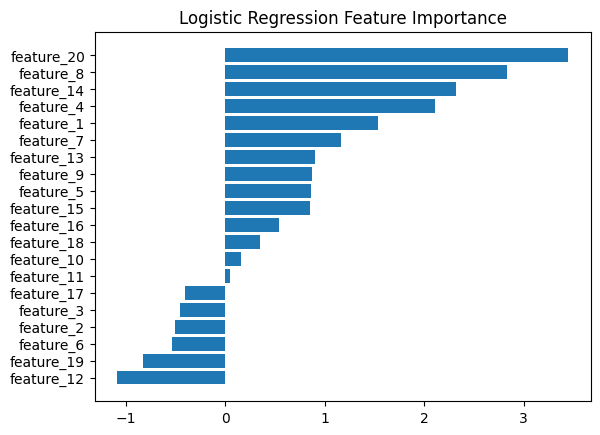

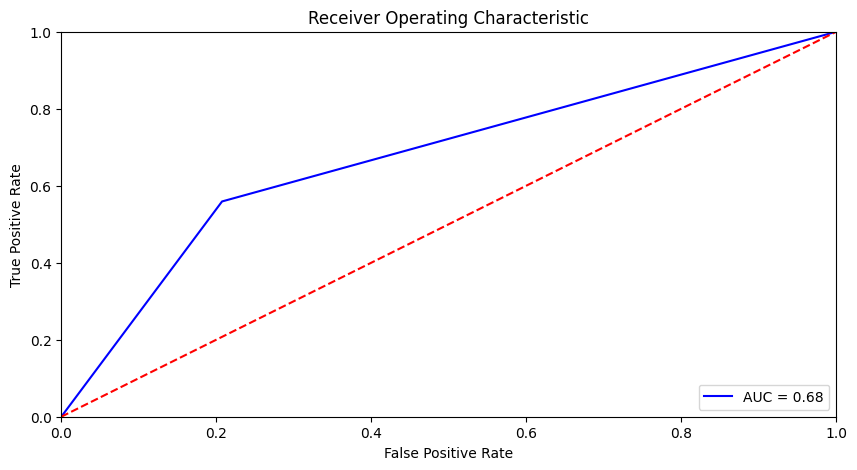

In [26]:
trained_model = model_obj.train_model(LogisticRegression(random_state=42), X_train_mid, y_train_mid)
y_pred = model_obj.predict_data(trained_model, X_test)
model_obj.important_features('Logistic Regression', trained_model)
model_obj.print_metrics(y_pred, y_test, limited=False) # if limited==False, classif report and confusion matrix will be printed
model_obj.plot_roc_auc_curve(y_pred, y_test)

### XGBoost Classifier

Accuracy: 0.92029
F1 Score: 0.10358
Precision: 0.29570
Recall: 0.06279
ROC AUC Score: 0.52547
[[10937   131]
 [  821    55]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11068
           1       0.30      0.06      0.10       876

    accuracy                           0.92     11944
   macro avg       0.61      0.53      0.53     11944
weighted avg       0.88      0.92      0.90     11944



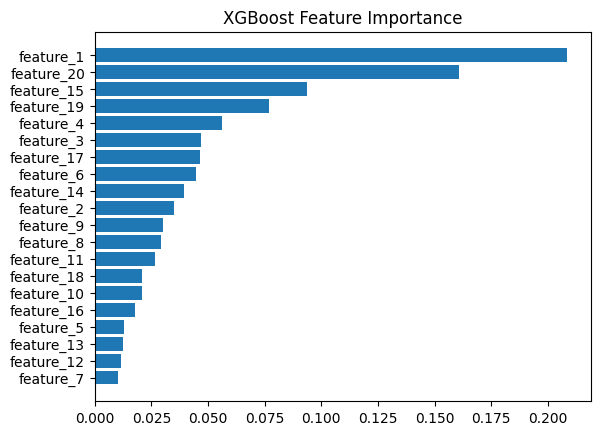

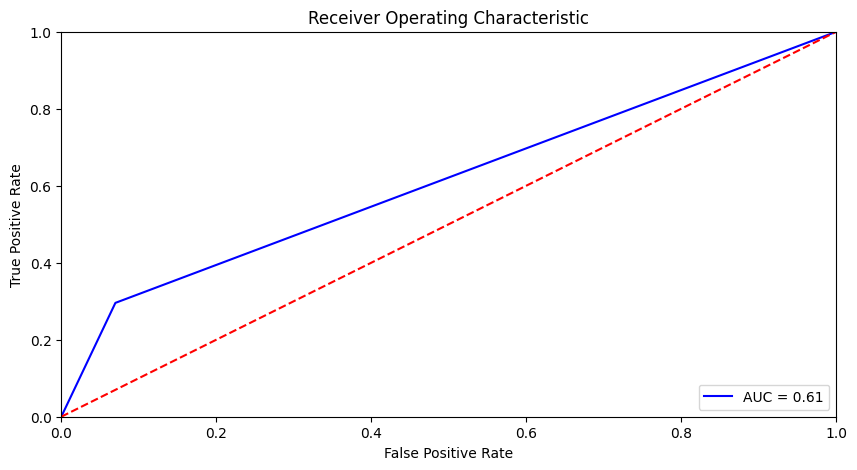

In [27]:
trained_model = model_obj.train_model(XGBClassifier(random_state=42), X_train_mid, y_train_mid)
y_pred = model_obj.predict_data(trained_model, X_test)
model_obj.important_features('XGBoost', trained_model)
model_obj.print_metrics(y_pred, y_test, limited=False) # if limited==False, classif report and confusion matrix will be printed
model_obj.plot_roc_auc_curve(y_pred, y_test)

## Evaluation and comments
- While accuracy seems good, this is misleading due to the imbalanced test set. If we observe precision, recall and f1, we notice that results are not so good on minority class (subscription=1). The models struggle to predict accurately the samples of that class.

- Moreover, the areas under curve are around 0.68(LR) and 0.61(XGB), which is just a bit better than randomness.

- Further study may include various improvements for better performance, like hyperparameter tuning, feature engineering, more algorithms, different sampling methods or adding variables from users.csv.

- Regarding the explanation of how the models learned from the input data, **features 1,20,4** are the most important ones on both algorithms. The first two are numerical, while the last(4) is a categorical variable. Of course, there are more important variables in each model like 15, 8, 14. This was calculated from the coefficients of the models, but we could also use permutation or stepwise selection like we did earlier on the analysis. This step is quite important in order to understand users behavior and add value to the business intelligence (with A/B tests of new components and more). 